In [ ]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Install Big Query for Pandas
pip install --upgrade 'google-cloud-bigquery[bqstorage,pandas]'

In [ ]:
# You should only have to do this once
%load_ext google.cloud.bigquery

In [ ]:
# %% = the magic cell
# run BQ query as normal
%%bigquery
SELECT Index_of_Multiple_Deprivation_Decile, COUNT(person_id)as count
 FROM
  `yhcr-prd-phm-bia-core.CB_LOOKUPS.tbl_IMD_by_LSOA` a
  inner join 
  `yhcr-prd-phm-bia-core.CB_LOOKUPS.tbl_person_lsoa`b 
  on a.LSOA_code = b.lsoa
  WHERE LSOA_Name LIKE 'Bradford%'
  GROUP BY Index_of_Multiple_Deprivation_Decile
  order by Index_of_Multiple_Deprivation_Decile asc
# Results will print as a table below

In [ ]:
# Adding df (or whatever name you want) saves the query as a dataframe that you can then refer to.
%%bigquery df
SELECT Index_of_Multiple_Deprivation_Decile, COUNT(person_id)as count
 FROM
  `yhcr-prd-phm-bia-core.CB_LOOKUPS.tbl_IMD_by_LSOA` a
  inner join 
  `yhcr-prd-phm-bia-core.CB_LOOKUPS.tbl_person_lsoa`b 
  on a.LSOA_code = b.lsoa
  WHERE LSOA_Name LIKE 'Bradford%'
  GROUP BY Index_of_Multiple_Deprivation_Decile
  order by Index_of_Multiple_Deprivation_Decile asc

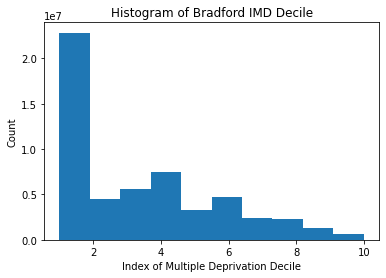

In [ ]:
# Plt is for matplotlib 
plt.hist(df['Index_of_Multiple_Deprivation_Decile'], bins=10, weights=df['count'])
plt.xlabel('Index of Multiple Deprivation Decile')
plt.ylabel('Count')
plt.title('Histogram of Bradford IMD Decile')
#saves plot as a png
plt.savefig('IMD.png', bbox_inches='tight',dpi=300)

In [ ]:
# You can also print results here
print(df)

   Index_of_Multiple_Deprivation_Decile     count
0                                     1  22828488
1                                     2   4491612
2                                     3   5547256
3                                     4   7420759
4                                     5   3321725
5                                     6   4716202
6                                     7   2401071
7                                     8   2293397
8                                     9   1305386
9                                    10    632939
